In [223]:
import os
import re


import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [224]:
# Define colors for modes
from scipy.ndimage import gaussian_filter1d
import pandas as pd
import seaborn as sns

MODE_COLORS = {"hard": "blue", "soft": "red", "Weady et al.": "black"}
LINE_STYLES = {"$\\lambda = 10^{-2}$": "solid",
               "$\\lambda = 10^{-3}$": "dashed", "$\\lambda = 10^{-4}$": "dotted"}

In [225]:
from load_combined import load_combined

source_folders = [
    # "../data/hybrid/",
    f"../code/cpp/build/src/cfl"

]

# find recursive subfolders within source_folders
sim_dirs = []
for folder in source_folders:
    for root, dirs, files in os.walk(folder):
        # skip if /data as last part of path
        if "logs" in root or "data" in root.split(os.sep)[-1]:
            continue

        if any(f.endswith(".pvtu") for f in os.listdir(root)):
            sim_dirs.append(os.path.join(root))

particles_dict, sim_dict, params_dict = load_combined(sim_dirs, offset=0)

loading ../code/cpp/build/src/cfl/vtk_output_hard/3
loading ../code/cpp/build/src/cfl/vtk_output_hard/2
loading ../code/cpp/build/src/cfl/vtk_output_hard/0.8
loading ../code/cpp/build/src/cfl/vtk_output_hard/0.25
loading ../code/cpp/build/src/cfl/vtk_output_hard/1.0
loading ../code/cpp/build/src/cfl/vtk_output_hard/0.5


In [226]:
sim_dict

,iteration,simulation_time_s,time_since_last_log_s,step,num_particles,num_constraints,colony_radius,recursive_iterations,bbpgd_iterations,max_overlap,...,load_imbalance,dt_s,x,y,z,rank,Mode,Sensitivity,sim_dir,offset
0,0,0.01000,0.020658,0,1,0,0.25500,1,10,0.000000,...,18.00000,0.009930,NaN,NaN,NaN,0,hard,../code/cpp/build/src/cfl/vtk_output_hard/3ass...,.._code_cpp_build,0
1,1,2.41581,3.669730,1317,8,7,5.25527,1,10,0.000004,...,18.00000,0.000884,NaN,NaN,NaN,0,hard,../code/cpp/build/src/cfl/vtk_output_hard/3ass...,.._code_cpp_build,0
2,2,5.99153,13.154000,3387,256,1752,10.25950,4,110,0.000623,...,16.17190,0.002015,NaN,NaN,NaN,0,hard,../code/cpp/build/src/cfl/vtk_output_hard/3ass...,.._code_cpp_build,0
3,3,7.17189,19.703200,4006,1024,7765,15.26220,4,280,0.000677,...,6.59180,0.002118,NaN,NaN,NaN,0,hard,../code/cpp/build/src/cfl/vtk_output_hard/3ass...,.._code_cpp_build,0
4,4,7.82673,17.093000,4345,2040,16138,20.28000,4,390,0.000836,...,4.01471,0.002097,NaN,NaN,NaN,0,hard,../code/cpp/build/src/cfl/vtk_output_hard/3ass...,.._code_cpp_build,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,16,11.22280,1170.990000,46080,27293,431135,80.29640,5,880,0.000520,...,1.16469,0.000333,NaN,NaN,NaN,0,hard,../code/cpp/build/src/cfl/vtk_output_hard/0.5a...,.._code_cpp_build,0
122,17,11.42920,1614.010000,46691,32127,508452,85.30810,5,1680,0.000811,...,1.17098,0.000349,NaN,NaN,NaN,0,hard,../code/cpp/build/src/cfl/vtk_output_hard/0.5a...,.._code_cpp_build,0
123,18,11.60620,1718.390000,47177,35733,660260,90.31120,6,950,0.000587,...,1.14953,0.000351,NaN,NaN,NaN,0,hard,../code/cpp/build/src/cfl/vtk_output_hard/0.5a...,.._code_cpp_build,0
124,19,11.77930,1875.660000,47657,39011,618895,95.32010,5,1630,0.000722,...,1.14060,0.000364,NaN,NaN,NaN,0,hard,../code/cpp/build/src/cfl/vtk_output_hard/0.5a...,.._code_cpp_build,0


In [227]:
# print sizte of particles_dict in MB
print(f"Loaded particles_dict with {particles_dict.memory_usage(deep=True).sum() / (1024**2):.2f} MB")
print(f"Loaded sim_dict with {sim_dict.memory_usage(deep=True).sum() / (1024**2):.2f} MB")
print(f"Loaded params_dict with {params_dict.memory_usage(deep=True).sum() / (1024**2):.2f} MB")

Loaded particles_dict with 117.86 MB
Loaded sim_dict with 0.05 MB
Loaded params_dict with 0.06 MB


In [228]:
sim_dict.keys()

Index(['iteration', 'simulation_time_s', 'time_since_last_log_s', 'step',
       'num_particles', 'num_constraints', 'colony_radius',
       'recursive_iterations', 'bbpgd_iterations', 'max_overlap', 'residual',
       'memory_usage_mb', 'peak_memory_mb', 'cpu_time_s', 'mpi_comm_time_s',
       'load_imbalance', 'dt_s', 'x', 'y', 'z', 'rank', 'Mode', 'Sensitivity',
       'sim_dir', 'offset'],
      dtype='object')

In [229]:
particles_dict["Sensitivity"]

0         ../code/cpp/build/src/cfl/vtk_output_hard/3ass...
1         ../code/cpp/build/src/cfl/vtk_output_hard/3ass...
2         ../code/cpp/build/src/cfl/vtk_output_hard/3ass...
3         ../code/cpp/build/src/cfl/vtk_output_hard/3ass...
4         ../code/cpp/build/src/cfl/vtk_output_hard/3ass...
                                ...                        
262100    ../code/cpp/build/src/cfl/vtk_output_hard/0.5a...
262101    ../code/cpp/build/src/cfl/vtk_output_hard/0.5a...
262102    ../code/cpp/build/src/cfl/vtk_output_hard/0.5a...
262103    ../code/cpp/build/src/cfl/vtk_output_hard/0.5a...
262104    ../code/cpp/build/src/cfl/vtk_output_hard/0.5a...
Name: Sensitivity, Length: 262105, dtype: object

In [247]:
particles_dict["cfl"] = particles_dict["Sensitivity"].str.extract(r"/([\d.]+)assumed").astype(float)

In [248]:
sim_dict["cfl"] = sim_dict["Sensitivity"].str.extract(r"/([\d.]+)assumed").astype(float)

In [249]:
sim_dict.keys()

Index(['iteration', 'simulation_time_s', 'time_since_last_log_s', 'step',
       'num_particles', 'num_constraints', 'colony_radius',
       'recursive_iterations', 'bbpgd_iterations', 'max_overlap', 'residual',
       'memory_usage_mb', 'peak_memory_mb', 'cpu_time_s', 'mpi_comm_time_s',
       'load_imbalance', 'dt_s', 'x', 'y', 'z', 'rank', 'Mode', 'Sensitivity',
       'sim_dir', 'offset', 'cfl'],
      dtype='object')

In [280]:
from scipy.optimize import curve_fit

runtimes = []
for k, g in sim_dict.groupby(["Mode", "cfl"]):

    final_time = g["cpu_time_s"].max()
    final_radius = g["colony_radius"].max()
    total_bbpgd_iterations = g["bbpgd_iterations"].mean()

    if final_radius < 100:
        print(f"Skipping {k} with final radius {final_radius:.2f} < 100")
        continue

    runtimes.append(pd.DataFrame({
        "runtime [min]": [final_time / 60],
        "Mode": [k[0]],
        "cfl": [k[1]],
        "colony_radius": [final_radius],
        "total_bbpgd_iterations": [total_bbpgd_iterations],
        "avg_step_time": [g["mpi_comm_time_s"].mean()],
        "dt_s": [g["dt_s"].mean()]
    }))
runtimes = pd.concat(runtimes, ignore_index=True)

runtimes

,runtime [min],Mode,cfl,colony_radius,total_bbpgd_iterations,avg_step_time,dt_s
0,254.185000,hard,0.25,100.003,200.000000,0.456287,0.000553
1,224.905000,hard,0.50,100.001,567.619048,1.653529,0.000739
2,236.346667,hard,0.80,100.009,843.809524,2.306897,0.000985
3,217.010000,hard,1.00,100.017,1568.571429,3.375642,0.001144
4,156.866333,hard,2.00,100.042,2652.380952,4.701904,0.001968
5,140.561167,hard,3.00,100.015,5853.809524,6.910388,0.002846


In [281]:
def makeplot(data, x, y, xlabel=None, ylabel=None, outname=None, variable="density",
             xscale=None, yscale=None,             **kwargs):

    fig, ax = plt.subplots(figsize=(10, 6))
    outname = outname or f"{y}_vs_{x}.png"

    sns.lineplot(data, x=x,                 y=y,
                 ax=ax, **kwargs, lw=2, ms=10, palette="tab10", legend='brief', 
                 )

    if xscale:
        ax.set_xscale(xscale, base=2)
    if yscale:
        ax.set_yscale(yscale, base=2)

    ax.set_xlabel(xlabel or x, fontsize=20)
    ax.set_ylabel(ylabel or y, fontsize=20)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    ax.grid(True)
    ax.legend(fontsize=22)

    if outname:
        fig.savefig(outname, dpi=300, bbox_inches="tight")
    return fig, ax

/tmp/ipykernel_1318803/3041613882.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data, x=x,                 y=y,


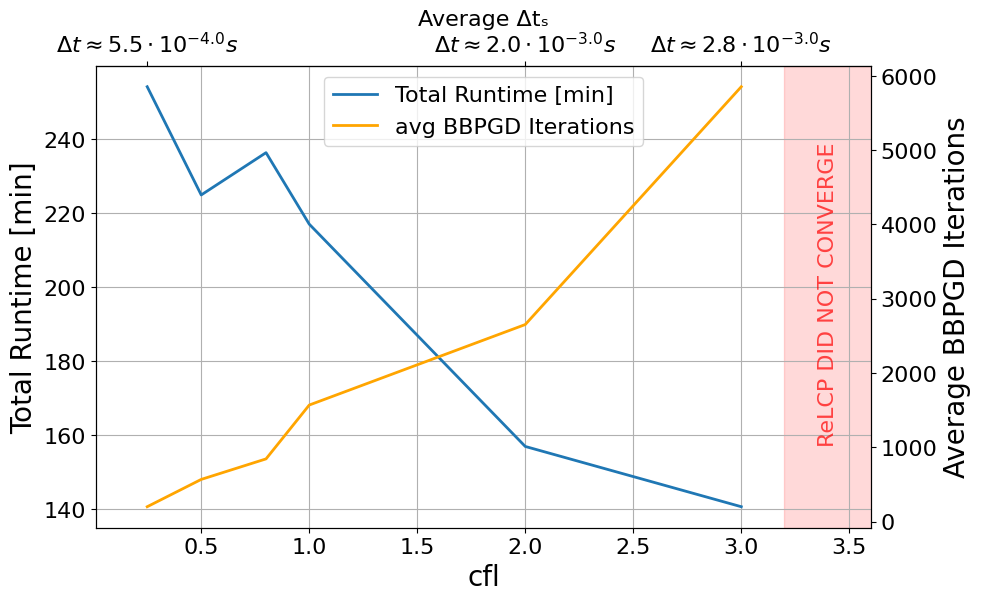

In [328]:
fig, ax = makeplot(runtimes, x="cfl",
                   y="runtime [min]", ylabel="Total Runtime [min]", label="Total Runtime [min]")

ax2 = ax.twinx()
sns.lineplot(data=runtimes, x='cfl', y='total_bbpgd_iterations',
             ax=ax2, color='orange', lw=2, label='avg BBPGD Iterations')
ax2.set_ylabel('Average BBPGD Iterations', fontsize=20)
ax2.tick_params(axis='y', labelsize=16)


avg_dt_per_cfl = runtimes.groupby("cfl")["dt_s"].mean().sort_index()

indices = np.array([0, 4, 5])

# Use those indices to sample
cfl_values = avg_dt_per_cfl.index.values[indices]
avg_dt_values = avg_dt_per_cfl.values[indices]


ax_top = ax.secondary_xaxis('top')
ax_top.set_xticks(cfl_values)
ax_top.set_xticklabels(
    [
        f"$\\Delta t \\approx {float(mant):.1f} \\cdot 10^{{{float(exp)}}} s$"
        for mant, exp in [f"{dt:.1e}".split("e") for dt in avg_dt_values]
    ],
    fontsize=16
)
ax_top.set_xlabel("Average Δtₛ", fontsize=16)

# Combine legends from both axes
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels() if 'ax2' in locals() else ([], [])
ax.get_legend().remove()
ax2.get_legend().remove()
ax.legend(lines + lines2, labels + labels2, fontsize=16, loc='upper center')

# Highlight region and annotate as before
ax.axvspan(3.2, 5, color="red", alpha=0.15)
ax2.text(3.4, ax2.get_ylim()[1]*0.5, "ReLCP DID NOT CONVERGE",
         color="red", fontsize=16, rotation=90, alpha=0.7,
         ha='center', va='center', rotation_mode='anchor')

ax.set_xlim(None, 3.6)

fig.savefig('cfl_vs_runtime_and_constraints.png', dpi=300, bbox_inches="tight")

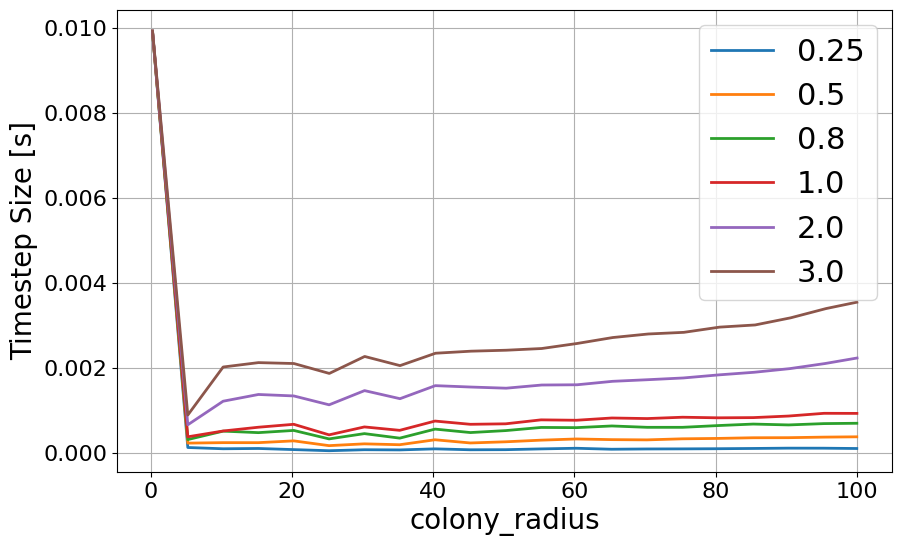

In [ ]:
fig, ax = makeplot(sim_dict, x="colony_radius",
                   y="dt_s", ylabel="Timestep Size [s]", hue="cfl")